# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Shifa Nur'aeni
- **Email:** shifanuraeni5@gmail.com
- **ID Dicoding:** shifa_nuraeni

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penjualan dan pendapatan perusahaan setiap bulan selama periode 2016 hingga 2018?
- Produk apa yang paling banyak dan paling sedikit terjual?
- Bagaimana demografi pelanggan yang kita miliki?
- Bagaimana Analisis RFMnya? - Kapan terakhir pelanggan melakukan transaksi?
                             - Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
                             - Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

## Import Semua Packages/Library yang Digunakan

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [148]:
#Memuat tabel customers
customers_df = pd.read_csv("data\customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [149]:
#Load tabel orders
orders_df = pd.read_csv("data\orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [150]:
#Memuat tabel product
product_df = pd.read_csv("data\products_dataset.csv")
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [151]:
#Load tabel order items
order_items_df = pd.read_csv("data\order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**Insight:**
- Kode diatas akan memuat tabel customers dan menampilkan 5 baris pertama dari DataFrame customers_df
- Kode diatas akan memuat tabel orders dan menampilkan 5 baris pertama dari DataFrame orders_df
- Kode diatas akan memuat tabel product dan menampilkan 5 baris pertama dari DataFrame product_df
- Kode diatas akan memuat tabel order items dan menampilkan 5 baris pertama dari DataFrame order_items_df


### Assessing Data

**Menilai Data customerd_df**

In [152]:
customers_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [153]:
customers_df.isna().sum()


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [154]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())


Jumlah duplikasi:  0


In [155]:
customers_df.describe()


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Menilai Data orders_df**

In [156]:
orders_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [157]:
orders_df.describe()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [158]:
orders_df.isna().sum()


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [159]:
orders_df.describe()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Menilai Data product_df**

In [160]:
product_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [161]:
product_df.isna().sum()


product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [162]:
print("Jumlah duplikasi: ", product_df.duplicated().sum())


Jumlah duplikasi:  0


In [163]:
product_df.describe()


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Menilai Data order_items_df**

In [164]:
order_items_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [165]:
order_items_df.isna().sum()


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [166]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())


Jumlah duplikasi:  0


In [167]:
order_items_df.describe()


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**
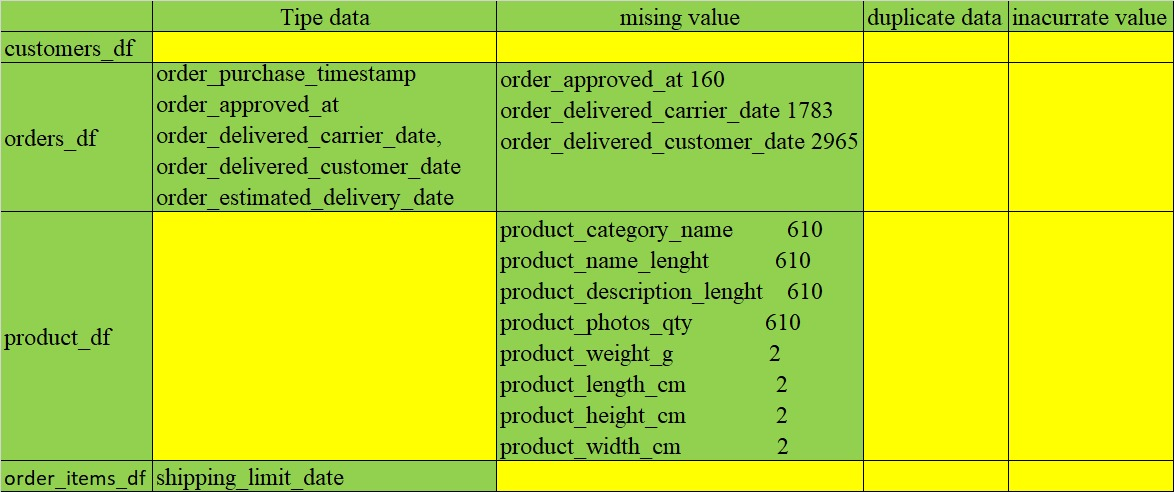

### Cleaning Data

**Membersihkan Data orders_df**


In [168]:
orders_df[orders_df.order_approved_at.isna()]


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [169]:
orders_df.order_approved_at.value_counts()


order_approved_at
2018-02-27 04:31:10    9
2017-12-05 10:30:42    7
2018-02-06 05:31:52    7
2017-11-07 07:30:38    7
2017-11-07 07:30:29    7
                      ..
2017-10-02 08:56:53    1
2017-06-08 02:45:24    1
2017-07-05 17:43:48    1
2018-05-25 17:15:21    1
2017-07-09 22:10:13    1
Name: count, Length: 90733, dtype: int64

In [170]:
orders_df[orders_df.order_delivered_carrier_date.isna()]


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaN,NaN,2016-12-09 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [171]:
orders_df.order_delivered_carrier_date.value_counts()


order_delivered_carrier_date
2018-05-09 15:48:00    47
2018-05-10 18:29:00    32
2018-05-07 12:31:00    21
2018-05-02 15:15:00    16
2018-07-24 16:07:00    16
                       ..
2017-08-18 16:42:51     1
2017-12-05 20:58:57     1
2017-10-03 20:26:19     1
2017-06-08 14:03:29     1
2018-03-09 22:11:59     1
Name: count, Length: 81018, dtype: int64

In [172]:
orders_df[orders_df.order_delivered_customer_date.isna()]


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [173]:
orders_df.order_delivered_customer_date.value_counts()


order_delivered_customer_date
2018-05-08 19:36:48    3
2018-05-14 20:02:44    3
2018-05-08 23:38:46    3
2016-10-27 17:32:07    3
2018-07-24 21:36:42    3
                      ..
2017-10-06 16:58:25    1
2017-06-19 19:19:30    1
2017-07-19 22:10:03    1
2018-06-04 23:54:32    1
2017-11-21 17:06:59    1
Name: count, Length: 95664, dtype: int64

In [174]:
orders_df.fillna(value={"order_approved_at": "2018-02-27 04:31:10",
                        "order_delivered_carrier_date": "2018-05-09 15:48:00",
                        "order_delivered_customer_date": "2018-05-08 19:36:48"},
                        inplace=True)


In [175]:
orders_df.isna().sum()


order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [176]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [177]:
orders_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


**Membersihkan Data product_df**

In [178]:
product_df[product_df.product_category_name.isna()]


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [179]:
product_df.product_category_name.value_counts()


product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64

In [180]:
product_df[product_df.product_name_lenght.isna()]


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [181]:
product_df.product_name_lenght.value_counts()


product_name_lenght
60.0    2182
59.0    2025
58.0    1887
57.0    1719
55.0    1683
        ... 
66.0       1
72.0       1
67.0       1
76.0       1
6.0        1
Name: count, Length: 66, dtype: int64

In [182]:
product_df[product_df.product_description_lenght.isna()]


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [183]:
product_df.product_description_lenght.value_counts()


product_description_lenght
404.0     94
729.0     86
651.0     66
703.0     66
236.0     65
          ..
2005.0     1
2603.0     1
2835.0     1
3172.0     1
3616.0     1
Name: count, Length: 2960, dtype: int64

In [184]:
product_df[product_df.product_photos_qty.isna()]


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [185]:
product_df.product_photos_qty.value_counts()


product_photos_qty
1.0     16489
2.0      6263
3.0      3860
4.0      2428
5.0      1484
6.0       968
7.0       343
8.0       192
9.0       105
10.0       95
11.0       46
12.0       35
13.0        9
15.0        8
17.0        7
14.0        5
18.0        2
20.0        1
19.0        1
Name: count, dtype: int64

In [186]:
product_df[product_df.product_weight_g.isna()]


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
product_df.product_weight_g.value_counts()


product_weight_g
200.0     2084
300.0     1561
150.0     1259
400.0     1206
100.0     1188
          ... 
4497.0       1
3040.0       1
908.0        1
8716.0       1
4188.0       1
Name: count, Length: 2204, dtype: int64

In [188]:
product_df[product_df.product_length_cm.isna()]


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
product_df.product_length_cm.value_counts()


product_length_cm
16.0    5520
20.0    2816
30.0    2029
18.0    1502
25.0    1387
        ... 
96.0       4
10.0       3
8.0        2
9.0        2
7.0        1
Name: count, Length: 99, dtype: int64

In [190]:
product_df[product_df.product_height_cm.isna()]


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [191]:
product_df.product_height_cm.value_counts()


product_height_cm
10.0    2548
15.0    2022
20.0    1991
16.0    1595
11.0    1551
        ... 
98.0       2
97.0       2
99.0       1
89.0       1
94.0       1
Name: count, Length: 102, dtype: int64

In [192]:
product_df[product_df.product_width_cm.isna()]


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
product_df.product_width_cm.value_counts()


product_width_cm
11.0     3718
20.0     3053
16.0     2808
15.0     2393
30.0     1786
         ... 
103.0       1
118.0       1
97.0        1
77.0        1
104.0       1
Name: count, Length: 95, dtype: int64

In [194]:
product_df.fillna(value={"product_category_name": "cama_mesa_banho",
                        "product_name_lenght": 60.0,
                        "product_description_lenght": 404.0,
                        "product_photos_qty": 1.0,
                        "product_weight_g": 200.0,
                        "product_length_cm": 16.0,
                        "product_height_cm": 10.0,
                        "product_width_cm": 11.0},
                        inplace=True)

In [195]:
product_df.isna().sum()


product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

**Memebersihkan Data order_items_df**

In [196]:
order_items_df["shipping_limit_date"] = pd.to_datetime(order_items_df["shipping_limit_date"])


In [197]:
order_items_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Insight:**
- Tipe data pada orders_df sudah diperbaiki
- Missing value pada order_df sudah diperbaiki
- Missing value pada product_df sudah diperbaiki
- Tipe data pada order_items_df sudah diperbaiki

## Exploratory Data Analysis (EDA)

### Explore ...

**Eskplorasi Data customers_df**

In [198]:
customers_df.describe(include="all")


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [199]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)


customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
agisse                1
vieiras               1
bertopolis            1
abadiania             1
xexeu                 1
Name: customer_id, Length: 4119, dtype: int64

In [200]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)


customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

**Eksplorasi Data orders_df**

In [201]:
orders_df.describe(include="all")


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 20:48:25.588771072,2018-01-07 03:30:45.390211072,2018-01-17 21:57:21.906587904,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-13 03:35:20,2017-09-19 19:52:27,2017-10-01 16:54:44,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 17:42:49,2018-01-29 12:18:58,2018-02-09 20:41:37,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 17:10:24,2018-05-09 15:48:00,2018-05-14 13:58:54,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


**Eksplorasi Data order_items_df**

In [202]:
order_items_df.describe(include="all")


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


In [203]:
# Group by 'order_id' dan 'product_id' untuk menghitung jumlah pembelian
quantity_df = order_items_df.groupby(['order_id', 'product_id']).size().reset_index(name='quantity')

# Gabungkan hasil ke order_items_df
order_items_df = order_items_df.merge(quantity_df, on=['order_id', 'product_id'], how='left')

# order_items_df sekarang memiliki kolom 'quantity'


In [204]:
# Buat kolom 'total_price' dengan mengalikan 'price' dan 'quantity'
order_items_df['total_price'] = order_items_df['price'] * order_items_df['quantity']


In [205]:
order_items_df.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,quantity,total_price
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,58.90
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,239.90
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,199.90


In [206]:
order_items_df.describe(include="all")


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,quantity,total_price
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320,1.289658,144.489590
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000,1.000000,0.850000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000,1.000000,46.607500
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000,1.000000,89.000000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000,1.000000,151.900000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000,20.000000,13440.000000


In [207]:
order_items_df.sort_values(by="price", ascending=False)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,quantity,total_price
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,1,6735.00
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,1,6729.00
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,1,6499.00
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,1,4799.00
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,1,4690.00
...,...,...,...,...,...,...,...,...,...
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,10,12.00
57307,8272b63d03f5f79c56e9e4120aec44ef,11,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,10,12.00
48625,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23,1,0.85
27652,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23,1,0.85


**Eksplorasi Data orders_df dan customers_df**

In [208]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [209]:
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)


customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: order_id, dtype: int64

**Eksplorasi Data product_df dan order_items_df**

In [210]:
seller_product_df = pd.merge(
    left=product_df,
    right=order_items_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
seller_product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,quantity,total_price
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,1,10.91
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,1,248.00
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,1,79.80
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,1,112.30
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,1,37.90


In [211]:
seller_product_df.groupby(by="product_category_name").agg({
    "product_id": "nunique",
    "quantity": "sum",
    "price": ["min", "max"]
})

product_id quantity  price         
                             nunique      sum    min      max
product_category_name                                        
agro_industria_e_comercio         74      310  12.99  2990.00
alimentos                         82      688   9.99   274.99
alimentos_bebidas                104      412   6.50   699.90
artes                             55      243   3.50  6499.00
artes_e_artesanato                19       24   9.80   289.49
...                              ...      ...    ...      ...
sinalizacao_e_seguranca           93      395   4.50   740.00
tablets_impressao_imagem           9       91  14.90   889.99
telefonia                       1134     5529   5.00  2428.00
telefonia_fixa                   116      468   6.00  1790.00
utilidades_domesticas           2335    10356   3.06  6735.00

[73 rows x 4 columns]

In [212]:
seller_product_df.groupby(by="product_category_name").agg({
    "seller_id": "nunique",
    "quantity": "sum",
    "total_price": "sum"
}).sort_values(by="total_price", ascending=False)

,seller_id,quantity,total_price
product_category_name,,,
cama_mesa_banho,431,15590,1426308.42
beleza_saude,492,11682,1387709.92
relogios_presentes,101,6721,1270808.08
informatica_acessorios,287,11147,1270679.46
esporte_lazer,481,10739,1135917.75
...,...,...,...
flores,3,41,1404.24
casa_conforto_2,4,44,940.87
cds_dvds_musicais,1,18,910.00


**Eksplorasi Data all_df**

In [213]:
all_df = pd.merge(
    left=seller_product_df,
    right=orders_customers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,...,delivered,2018-04-24 16:16:53,2018-04-24 19:04:19,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09,b1a1199364a4a7fe27c4486ab63f550d,13848,mogi-guacu,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,...,delivered,2018-01-31 18:55:36,2018-01-31 19:11:15,2018-02-05 22:44:47,2018-02-16 13:27:08,2018-02-22,4b86049cb99e4aa774031daa9cd18f18,20551,rio de janeiro,RJ
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,...,delivered,2018-07-09 21:18:01,2018-07-09 21:30:20,2018-07-10 11:49:00,2018-07-11 23:24:16,2018-07-18,f63805d9c7edb84d92413af34b86a39c,5821,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,...,delivered,2018-08-03 08:55:50,2018-08-03 09:31:42,2018-08-03 11:48:00,2018-08-06 15:14:32,2018-08-08,619e926d09b26efbd5180368b1ddc874,2018,sao paulo,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,...,delivered,2018-04-11 01:06:37,2018-04-11 01:30:23,2018-04-12 22:56:27,2018-04-13 22:41:44,2018-04-26,ad353b4fb0e294adc4eda48af73e68a6,5835,sao paulo,SP


In [214]:
all_df.groupby(by=["customer_state", "product_category_name"]).agg({
    "quantity": "sum",
    "total_price": "sum"
})

quantity  total_price
customer_state product_category_name                             
AC             artigos_de_natal                    1        69.90
               automotivo                          4       540.98
               bebes                               3       697.84
               beleza_saude                        9      1756.38
               brinquedos                          3       234.79
...                                              ...          ...
TO             portateis_casa_forno_e_cafe         1      1999.00
               relogios_presentes                 36      6094.89
               telefonia                          23      1314.10
               telefonia_fixa                      2      1390.99
               utilidades_domesticas              14      1275.75

[1368 rows x 2 columns]

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penjualan dan pendapatan perusahaan setiap bulan selama periode 2016 hingga 2018

In [215]:
all_df.rename(columns={'order_purchase_timestamp': 'order_date'}, inplace=True)
monthly_orders_df = all_df.resample(rule='M', on='order_date').agg({
    "order_id": "nunique",
    "total_price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)
monthly_orders_df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18464\799699242.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = all_df.resample(rule='M', on='order_date').agg({


,order_date,order_count,revenue
0,2016-09,3,537.30
1,2016-10,308,58915.20
2,2016-11,0,0.00
3,2016-12,1,10.90
4,2017-01,789,156349.23


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18464\1938445159.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = all_df.resample(rule='M', on='order_date').agg({


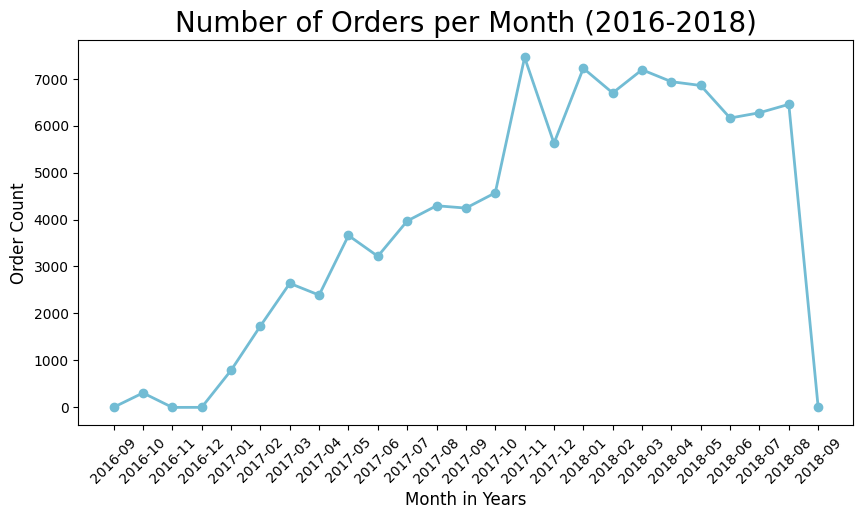

In [216]:
monthly_orders_df = all_df.resample(rule='M', on='order_date').agg({
    "order_id": "nunique",
    "total_price": "sum"
})


monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')

monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)


monthly_orders_df['order_date'] = pd.to_datetime(monthly_orders_df['order_date'], format='%Y-%m')


monthly_orders_df = monthly_orders_df.sort_values('order_date')


plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df["order_date"].dt.strftime('%Y-%m'), monthly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Orders per Month (2016-2018)", loc="center", fontsize=20)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Month in Years", fontsize=12)
plt.ylabel("Order Count", fontsize=12)
plt.show()


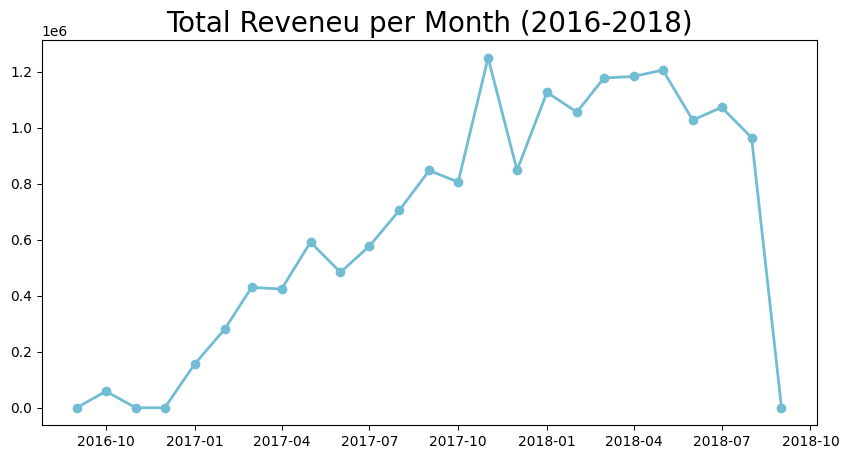

In [217]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_date"],
    monthly_orders_df["revenue"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Reveneu per Month (2016-2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 2: Produk Apa yang Paling Banyak dan Paling Sedikit Terjual?

In [218]:
sum_order_items_df = all_df.groupby("product_category_name").quantity.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(15)

,product_category_name,quantity
0,cama_mesa_banho,15590
1,moveis_decoracao,13290
2,beleza_saude,11682
3,informatica_acessorios,11147
4,esporte_lazer,10739
5,utilidades_domesticas,10356
6,ferramentas_jardim,6885
7,relogios_presentes,6721
8,telefonia,5529
9,automotivo,5253


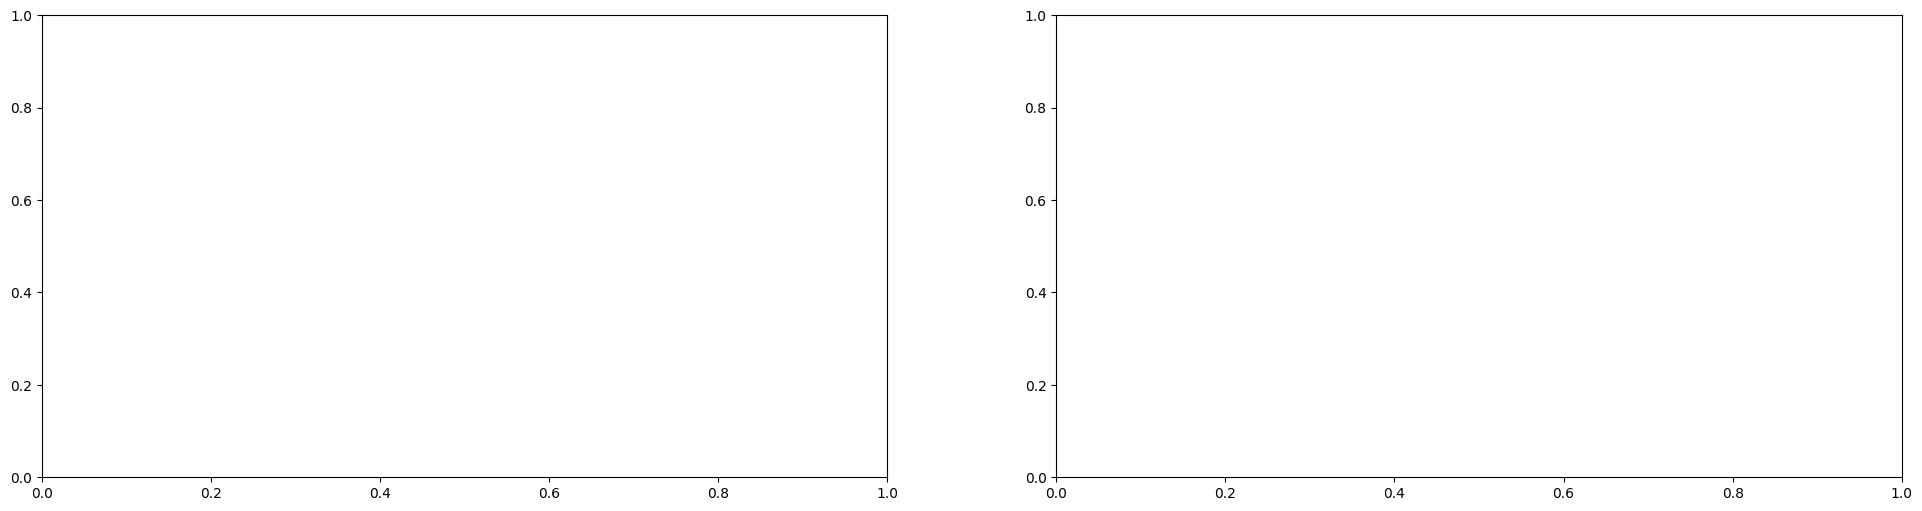

In [219]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,6))


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18464\278714204.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quantity", y="product_category_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18464\278714204.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quantity", y="product_category_name", data=sum_order_items_df.sort_values(by="quantity", ascending=True).head(5), palette=colors, ax=ax[1])


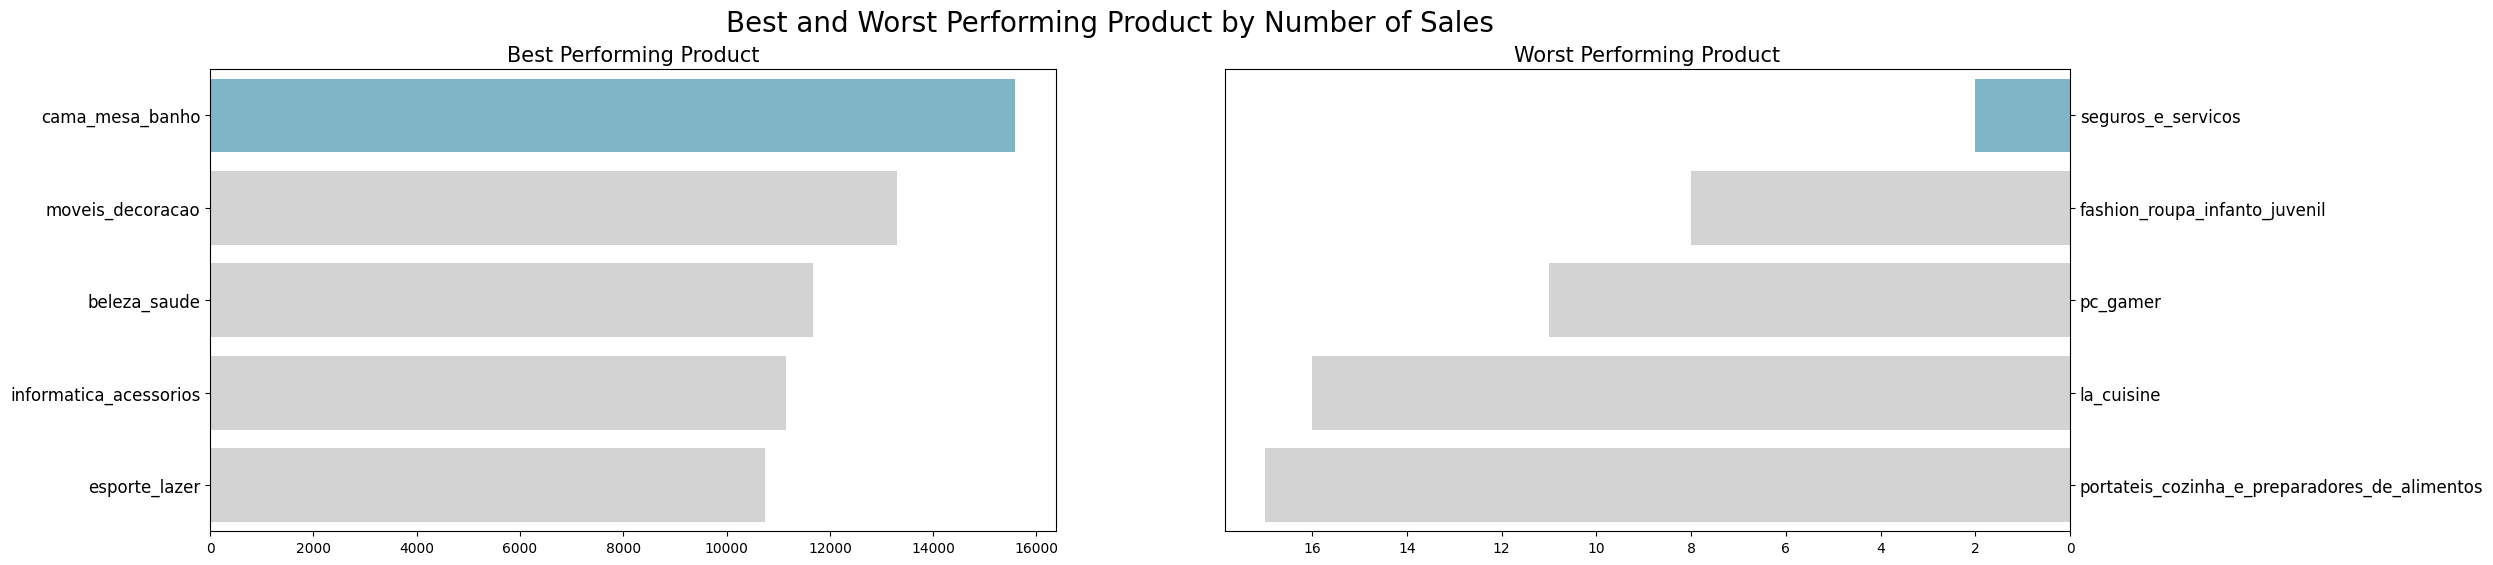

In [220]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="quantity", y="product_category_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="quantity", y="product_category_name", data=sum_order_items_df.sort_values(by="quantity", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

## Analisis Lanjutan (Opsional)

### Pertanyaan 3: Bagaimana Demografi Pelanggan yang Kita Miliki?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18464\1126627512.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18464\1126627512.py:8: UserWarning: 
The palette list has fewer values (8) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


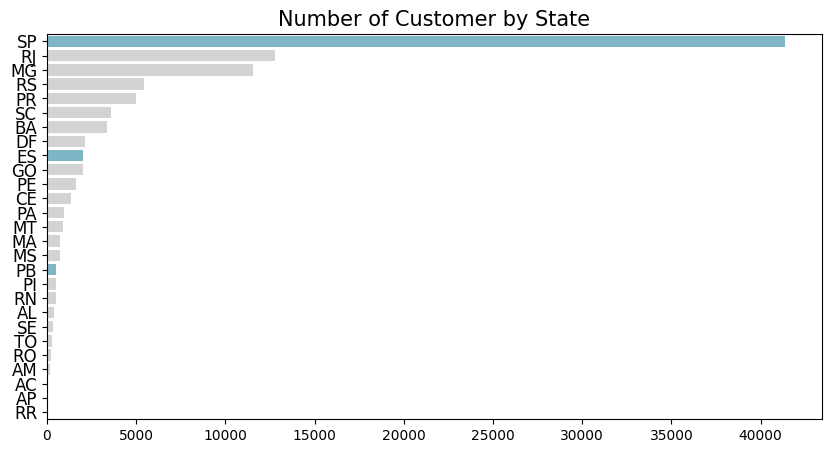

In [221]:
bystate_df = all_df.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bystate_df
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    y="customer_state",
    x="customer_count",
    data=bystate_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by State", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

### Pertanyaan 4: RFM Analysis

In [222]:
orders_df.rename(columns={'order_purchase_timestamp': 'order_date'}, inplace=True)
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_date": "max",
    "order_id": "nunique",
    "total_price": "sum"
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

#menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_date"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337
1,000161a058600d5901f007fab4c27140,1,54.90,458
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,596
3,0002414f95344307404f0ace7a26f1d5,1,149.90,427
4,000379cdec625522490c315e70c7a9fb,1,93.00,198


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18464\3123904706.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18464\3123904706.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18464\3123904706.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` fo

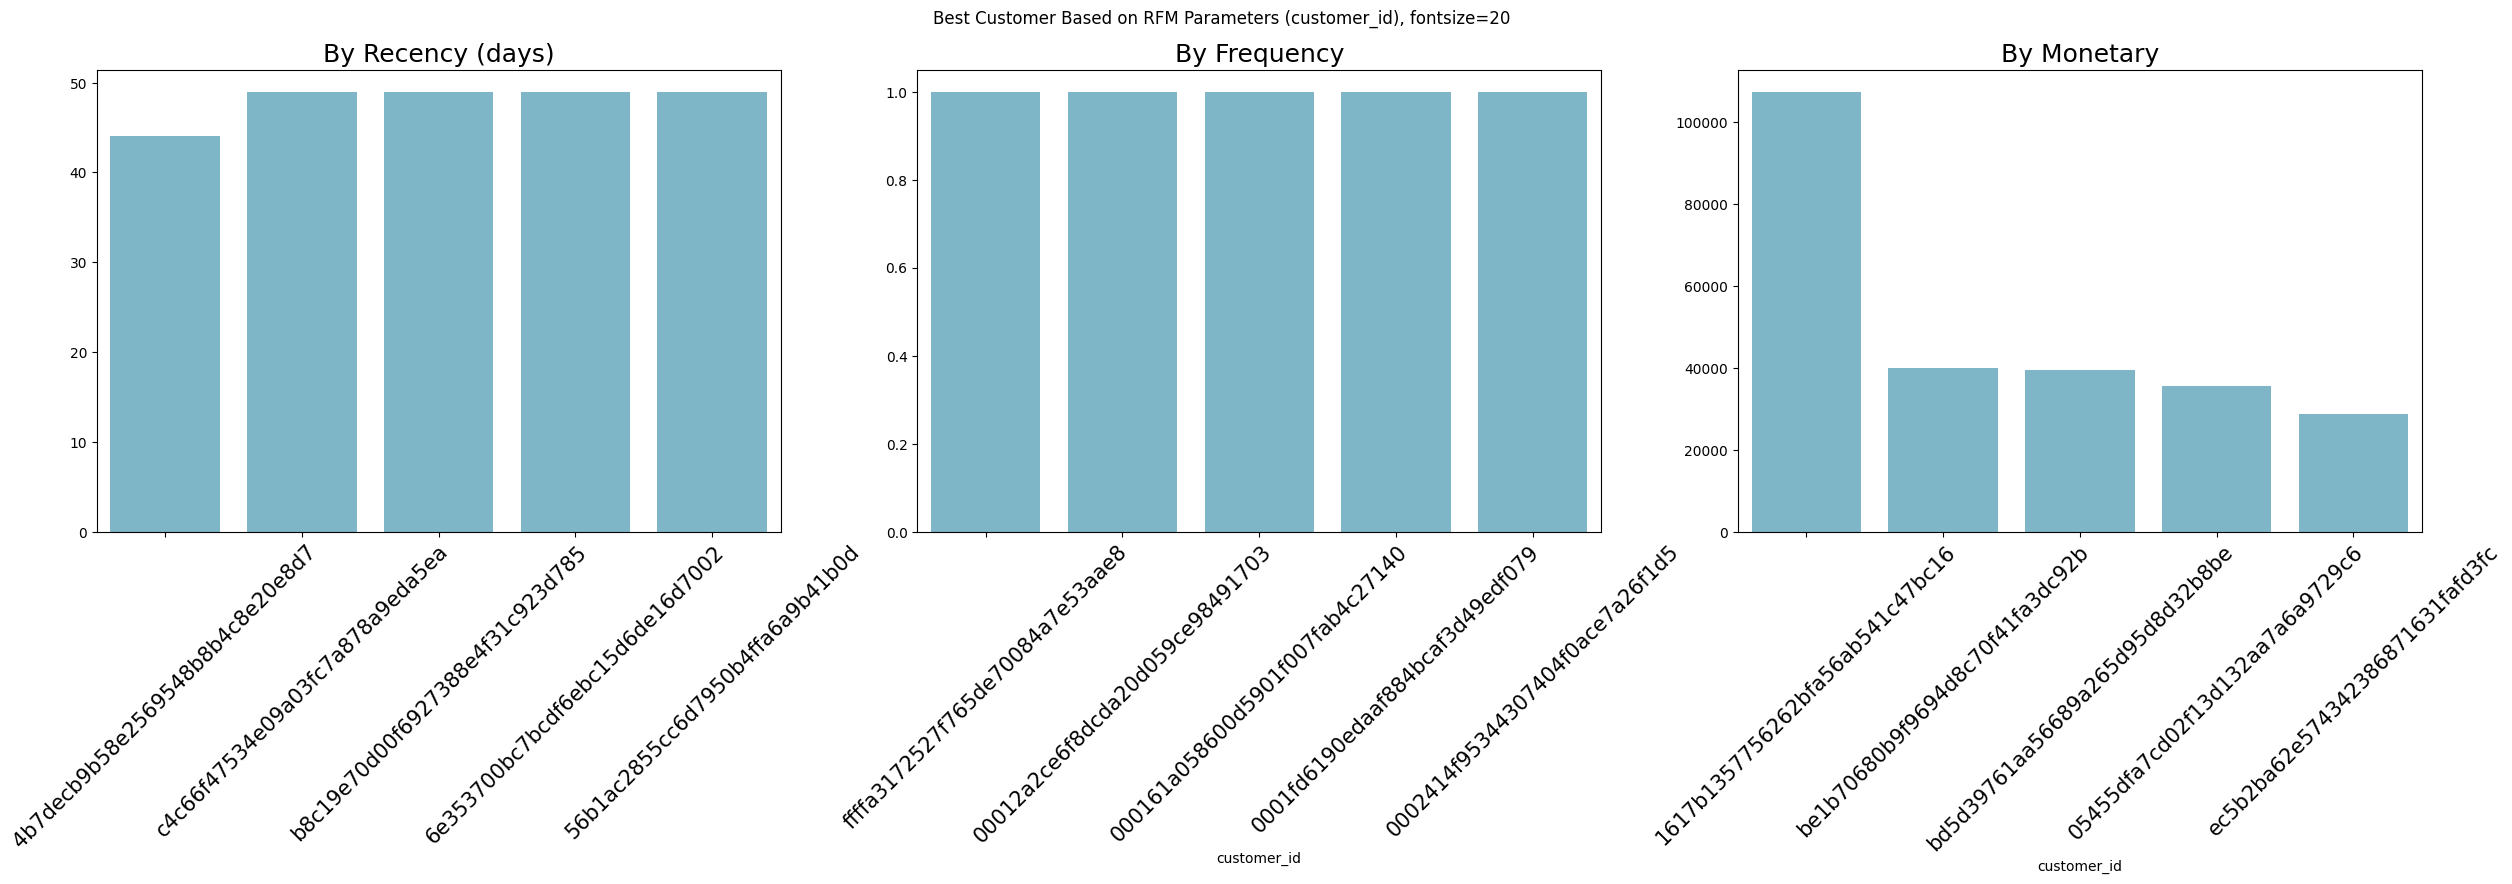

In [223]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis = 'x', rotation=45, labelsize=15)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_ylabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', rotation=45, labelsize=15)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_ylabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', rotation=45, labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id), fontsize=20")
plt.show()

## Conclusion

**Insight:**
Analisis RFM bertujuan untuk memahami perilaku pelanggan berdasarkan keterkinian transaksi (recency), frekuensi pembelian (frequency), dan nilai transaksi (monetary). Dari hasil ini, perusahaan dapat merancang strategi pemasaran yang efektif untuk meningkatkan retensi pelanggan, mendorong transaksi berulang, dan memaksimalkan nilai pelanggan bagi bisnis.

- Conclution pertanyaan 1
> Temuan Utama:

- Pertumbuhan Pesat: Jumlah pesanan dan pendapatan meningkat secara signifikan dari akhir 2016 hingga mencapai puncaknya pada November 2017. Hal ini menunjukkan adanya peningkatan performa perusahaan, baik dari segi volume penjualan maupun pendapatan.
- Stabilitas: Setelah puncak, jumlah pesanan dan pendapatan stabil di level tinggi (sekitar 5.500-6.500 pesanan per bulan dan pendapatan mendekati 1,2 juta AUD) hingga pertengahan 2018.
- Penurunan Drastis: Terjadi penurunan tajam pada September 2018, baik dari segi jumlah pesanan maupun pendapatan.

> Interpretasi Penting:

- Pertumbuhan 2017: Peningkatan performa pada akhir 2017 bisa disebabkan oleh strategi pemasaran yang efektif, momen promosi (seperti hari besar belanja), atau peningkatan operasional yang memudahkan pelanggan.
- Stabilitas 2018: Kestabilan menunjukkan bahwa perusahaan berhasil mempertahankan performa selama hampir setahun, namun sedikit fluktuasi bisa mengindikasikan adanya faktor eksternal atau perubahan perilaku pelanggan.
- Penurunan September 2018: Penurunan tajam memerlukan evaluasi lebih lanjut. Penyebab potensialnya bisa berupa:
  - Masalah operasional (seperti rantai pasok atau stok produk).
  - Berakhirnya kampanye promosi besar.
  - Faktor musiman atau perubahan preferensi pelanggan.

> Rekomendasi Tindakan:

- Analisis Penyebab Penurunan: Lakukan investigasi mendalam terhadap penurunan tajam di September 2018, misalnya mengevaluasi laporan operasional, feedback pelanggan, atau efektivitas kampanye promosi.
- Optimalkan Strategi Promosi: Mengulangi strategi yang berhasil di akhir 2017, seperti kampanye musiman, diskon besar, atau iklan yang ditargetkan.
- Diversifikasi Produk: Menawarkan produk baru atau inovasi untuk menjaga momentum pertumbuhan dan menghindari stagnasi.
- Monitoring Rutin: Pantau tren penjualan dan pendapatan secara berkala untuk mendeteksi anomali lebih cepat dan mengambil tindakan yang lebih proaktif.

> Pentingnya Hasil Ini:

Analisis ini menunjukkan bahwa perusahaan mampu tumbuh secara signifikan dalam periode dua tahun, namun rentan terhadap penurunan mendadak. Dengan memahami pola ini, perusahaan bisa mempertahankan performa tinggi melalui strategi yang terukur dan mengatasi faktor penyebab penurunan secara efektif.


- Conclution pertanyaan 2

> Temuan Utama:

- Produk dengan Penjualan Terbanyak:
  Produk cama_mesa_banho memiliki performa penjualan terbaik dengan lebih dari 15.000 penjualan. Ini menunjukkan popularitas produk di kategori perlengkapan rumah tangga.
- Produk dengan Penjualan Tersedikit:
  Produk seguros_e_servicos memiliki performa terburuk dengan jumlah penjualan yang sangat rendah (hanya sekitar 2 penjualan). Kategori lain dengan performa rendah termasuk fashion_roupa_infanto_juvenil dan pc_gamer.

> Interpretasi Penting:

- Kinerja Tinggi untuk Produk Populer:
  Produk seperti cama_mesa_banho dan moveis_decoracao termasuk dalam kebutuhan rumah tangga yang kemungkinan memiliki permintaan konstan. Tren ini bisa disebabkan oleh kebutuhan harian pelanggan dan jangkauan pasar yang luas.
- Kinerja Rendah untuk Produk Spesifik:
  Produk seperti seguros_e_servicos (layanan asuransi) mungkin memiliki penjualan rendah karena:
  - Pasar yang sangat terbatas.
  - Kurangnya promosi atau edukasi pelanggan terkait manfaat layanan tersebut.
  - Kategori layanan yang memerlukan pendekatan berbeda dibanding produk fisik.
  - Kategori lain seperti pc_gamer dan fashion_roupa_infanto_juvenil mungkin dipengaruhi oleh segmentasi pasar yang lebih kecil atau persaingan tinggi.

> Rekomendasi Tindakan:

- Optimalkan Produk Unggulan:
  Fokus pada peningkatan ketersediaan, promosi, dan variasi produk cama_mesa_banho dan moveis_decoracao untuk memaksimalkan pendapatan dari kategori terpopuler ini. Strategi diskon atau penawaran bundling dapat meningkatkan loyalitas pelanggan.
- Evaluasi Produk Kurang Laku:
  - Untuk seguros_e_servicos, lakukan riset mendalam untuk memahami hambatan penjualan dan pertimbangkan kampanye edukasi yang meningkatkan kesadaran manfaat layanan.
  - Untuk produk seperti fashion_roupa_infanto_juvenil dan pc_gamer, identifikasi tren pasar dan lakukan strategi pemasaran yang lebih terfokus, seperti kampanye digital atau kolaborasi dengan influencer di segmen target.
- Diversifikasi Penawaran:
  Jika kategori berkinerja buruk sulit untuk ditingkatkan, pertimbangkan untuk memperkenalkan produk atau layanan baru yang lebih sesuai dengan kebutuhan pasar saat ini.

> Pentingnya Hasil Ini:

Dengan memahami produk terbaik dan terburuk, perusahaan dapat mengalokasikan sumber daya secara lebih efektif. Fokus pada produk yang paling diminati akan meningkatkan pendapatan, sementara evaluasi produk berkinerja rendah akan membantu mengurangi kerugian dan membuka peluang untuk inovasi baru.


- Conclution Pertanyaan 3

> Temuan Utama

- Dominasi oleh Negara Bagian SP (São Paulo): Sebagian besar pelanggan berasal dari negara bagian São Paulo (SP), dengan jumlah pelanggan jauh lebih tinggi dibandingkan negara bagian lainnya. SP memiliki lebih dari 40.000 pelanggan, mendominasi hampir seluruh pangsa pelanggan.
- Negara Bagian Lain dengan Pangsa Pelanggan Signifikan: RJ (Rio de Janeiro), MG (Minas Gerais), dan RS (Rio Grande do Sul) juga memiliki jumlah pelanggan yang cukup besar, meskipun masih jauh di bawah SP.
- Negara Bagian dengan Pangsa Pelanggan Rendah: Negara bagian seperti AP (Amapá), RR (Roraima), dan AC (Acre) memiliki jumlah pelanggan yang sangat sedikit, menunjukkan pangsa pasar yang kecil di wilayah tersebut.


> Pentingnya Hasil

- Kekuatan Pasar SP: São Paulo menunjukkan potensi pasar terbesar, yang bisa mencerminkan konsentrasi urbanisasi, ekonomi yang kuat, dan aksesibilitas terhadap layanan perusahaan.
- Wilayah Potensial: Wilayah seperti RJ, MG, dan RS memiliki peluang untuk strategi pertumbuhan tambahan, mengingat basis pelanggan yang signifikan.
- Tantangan di Wilayah Tertinggal: Negara-negara bagian dengan pangsa rendah bisa jadi menghadapi tantangan seperti aksesibilitas geografis, daya beli yang rendah, atau kurangnya penetrasi pasar.

> Rekomendasi Strategis

- Memperkuat Posisi di SP:
  - Fokus pada peningkatan layanan, loyalitas pelanggan, dan program promosi eksklusif untuk mempertahankan dominasi pasar di SP.
  - Mengalokasikan sumber daya tambahan untuk menghadapi kompetitor potensial di wilayah ini.
- Ekspansi di Wilayah RJ, MG, dan RS:
  - Melakukan riset pasar lebih mendalam untuk memahami kebutuhan dan preferensi pelanggan di wilayah tersebut.
  - Mengembangkan strategi pemasaran yang disesuaikan dengan karakteristik lokal untuk meningkatkan penetrasi pasar.
- Peningkatan di Wilayah Kurang Tersentuh:
  - Identifikasi hambatan utama (logistik, teknologi, atau sosioekonomi) di negara bagian dengan pangsa rendah.
  - Kembangkan inisiatif khusus, seperti program edukasi atau promosi, untuk meningkatkan daya tarik produk atau layanan di wilayah tersebut.
- Diversifikasi Strategi:
  - Sesuaikan strategi distribusi dan pemasaran untuk menciptakan inklusivitas di pasar-pasar kecil sambil memanfaatkan kekuatan di wilayah inti.

> Kesimpulan

Visualisasi ini menyoroti pentingnya segmentasi geografis dalam strategi bisnis. Dengan memanfaatkan potensi pasar di SP, memperkuat kehadiran di wilayah RJ, MG, dan RS, serta mengatasi tantangan di wilayah kecil, perusahaan dapat mengoptimalkan pertumbuhan bisnis secara signifikan.



- Conclution Pertanyaan 4

> Kapan terakhir pelanggan melakukan transaksi (Frequency)?

Berdasarkan analisis recency, rata-rata pelanggan terakhir kali melakukan transaksi sekitar 240,7 hari yang lalu. Hal ini menunjukkan bahwa sebagian besar pelanggan belum melakukan pembelian dalam beberapa bulan terakhir. Waktu yang cukup lama sejak transaksi terakhir mengindikasikan bahwa banyak pelanggan yang mungkin tidak terlalu aktif atau terlibat dengan merek dalam beberapa bulan terakhir. Ini bisa jadi akibat dari penurunan frekuensi transaksi atau hilangnya ketertarikan terhadap produk yang ditawarkan. Untuk meningkatkan frekuensi transaksi, penting untuk melakukan kampanye pemulihan pelanggan. Ini dapat dilakukan dengan mengirimkan promosi yang dipersonalisasi atau diskon untuk mendorong pelanggan kembali melakukan pembelian. Selain itu, melakukan analisis lebih dalam tentang faktor-faktor yang menyebabkan penurunan transaksi, seperti perubahan tren atau masalah dengan produk yang ditawarkan, juga bisa membantu.


> Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir (Monetary)?

Rata-rata frekuensi pembelian pelanggan adalah 1 kali dalam beberapa bulan terakhir. Ini menunjukkan bahwa banyak pelanggan hanya melakukan transaksi tunggal dan tidak kembali untuk melakukan pembelian lebih lanjut. Meskipun pelanggan mungkin melakukan transaksi, mereka tidak cukup sering berbelanja kembali. Hal ini bisa menandakan bahwa perusahaan mungkin belum berhasil membangun loyalitas atau bahwa pelanggan belum merasakan kebutuhan untuk melakukan pembelian lebih dari sekali. Untuk meningkatkan frekuensi pembelian, perusahaan dapat mengimplementasikan program loyalitas yang menawarkan insentif bagi pelanggan untuk melakukan pembelian berulang. Selain itu, pendekatan pemasaran yang lebih kuat, seperti pengingat pembelian atau pengenalan produk baru secara reguler, dapat meningkatkan keterlibatan pelanggan.

> Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir (Recency)?

Rata-rata pengeluaran pelanggan dalam periode ini adalah sekitar AUD 164,97. Ini menunjukkan bahwa meskipun beberapa pelanggan membeli produk, sebagian besar pengeluaran terpusat pada transaksi individu yang cukup besar. Meskipun rata-rata pengeluaran cukup tinggi, angka ini bisa dipengaruhi oleh beberapa pelanggan dengan pengeluaran besar, sementara sebagian besar pelanggan lainnya mungkin hanya melakukan pembelian dengan nilai yang lebih rendah. Hal ini menunjukkan bahwa meskipun ada potensi pendapatan yang tinggi, distribusi pengeluaran tidak merata. Untuk meningkatkan pendapatan, perusahaan bisa mempertimbangkan strategi upselling atau cross-selling kepada pelanggan yang melakukan transaksi lebih kecil. Dengan menawarkan produk tambahan atau lebih mahal kepada pelanggan yang sudah berbelanja, dapat meningkatkan nilai pembelian mereka secara keseluruhan. Selain itu, mengidentifikasi pelanggan yang memiliki pengeluaran tinggi dan menawarkan mereka pengalaman atau penghargaan khusus dapat meningkatkan loyalitas dan meningkatkan pengeluaran lebih lanjut.












